In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0                                1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean_scores                  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [4]:
data.isna().sum()

                               0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean_scores                    0
dtype: int64

In [5]:
data.isna().sum()

                               0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean_scores                    0
dtype: int64

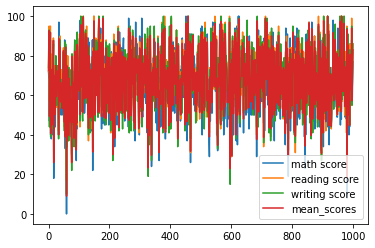

In [6]:
data.plot()

In [7]:
data.corr()

,math score,reading score,writing score,mean_scores
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
mean_scores,0.918744,0.970331,0.965669,1.000000


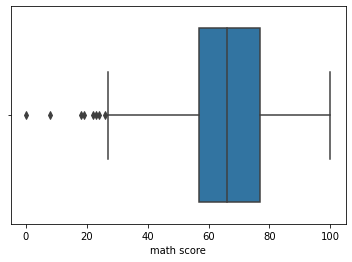

In [8]:
sns.boxplot(x= data['math score'])

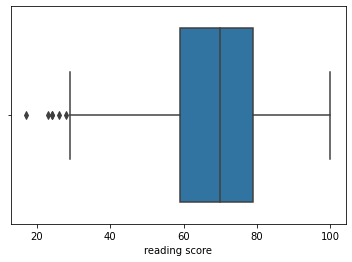

In [9]:
sns.boxplot(x= data['reading score'])

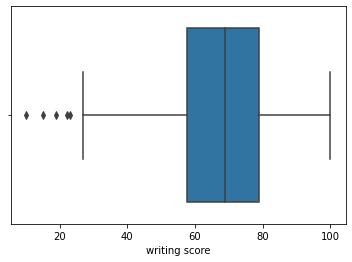

In [10]:
sns.boxplot(x= data['writing score'])

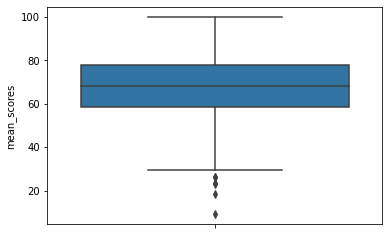

In [12]:
sns.boxplot(y = data["mean_scores"])

In [13]:
def drop_outliers(df,column_name,lower,upper):
    drop_outliers = df[column_name].between(df[column_name].quantile(lower), df[column_name].quantile(upper))
    
    print(str(df[column_name][drop_outliers].size) + "/" + str(df[column_name].size) + " data points remain.") 

    index_names = df[~drop_outliers].index
    return df.drop(index_names)


new_data = drop_outliers(data,"mean_scores",0.05,0.95) 

900/1000 data points remain.


In [15]:
new_data.shape

(900, 9)

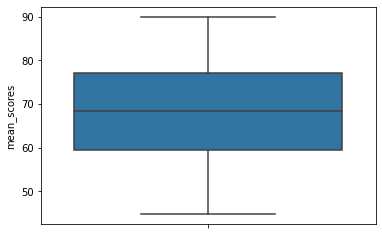

In [16]:
sns.boxplot(y = new_data["mean_scores"])

In [17]:
new_data['math score']

0      72
1      69
3      47
4      76
5      71
       ..
994    63
996    62
997    59
998    68
999    77
Name: math score, Length: 900, dtype: int64

In [19]:
math_score = new_data["math score"]
reading_score = new_data["reading score"]
writing_score = new_data["writing score"]
mean_score = new_data["mean_scores"]
X = new_data.drop(["math score","reading score","writing score","mean_scores"],axis = 'columns') 

In [20]:
X.head()

,,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none


In [21]:
X_encoded = X.apply(lambda x: x.astype('category')) 

X_encoded = pd.get_dummies(X_encoded,drop_first= True)
X_encoded

,_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,0,0,0,0,1,0,0,0,1,1
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


In [22]:
X_encoded.head()

,_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,1


In [24]:
mean_score

0      72.67
1      82.33
3      49.33
4      76.33
5      77.33
       ...  
994    62.67
996    57.33
997    65.00
998    74.33
999    83.00
Name: mean_scores, Length: 900, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [27]:

target = mean_score
X_train, X_test, y_train, y_tes = train_test_split(X_encoded, 
                                                      target, 
                                                      test_size=0.3, 
                                                      shuffle = True, 
                                                      random_state=1)

In [28]:
def calculateModel(real, predict):
    rmse = np.sqrt(mean_squared_error(real, predict))
    r2 = r2_score(real, predict)
    print("rmse:",rmse)
    print("r2 score:",r2)

In [29]:
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred = rf.predict(X_train)
print("Train set of RF")
calculateModel(y_train,rf_pred)

Random Forest Regressor
------------
Train set of RF
rmse: 8.79141533568873
r2 score: 0.3883543109356694
